<a href="https://colab.research.google.com/github/aminsarzaeem/deep/blob/main/HW3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A training model

In this section we use alexnet model and replace last layer with two class fully connected layer. then we will train the last layer with crossentropy loss.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import statistics
import random
import time
import math
%matplotlib inline
from torch.utils.data import DataLoader, random_split
#plt.rcParams['figure.figsize'] = (5.0, 3.0)
#plt.rcParams['font.size'] = 16

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [3]:
# Set hyperparameters
num_epochs = 20
batch_size = 256
learning_rate = 0.001


In [4]:
transform = transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224),transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Select training_set and testing_set
train_data = datasets.CIFAR10("data", train= True, download=True, transform = transform)
idx=np.where((np.array(train_data.targets)==0)|(np.array(train_data.targets)==1))[0]
train_data.targets=list(np.array(train_data.targets)[idx])
train_data.data=train_data.data[idx]
train_data.classes=train_data.classes[0:2]
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size,shuffle=True)

test_data = datasets.CIFAR10("data", train= False, download=True, transform = transform)
idx=np.where(np.array(test_data.targets)<2)[0]
test_data.targets=list(np.array(test_data.targets)[idx])
test_data.data=test_data.data[idx]
test_data.classes=test_data.classes[0:2]
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size,shuffle=True)

100%|██████████| 170498071/170498071 [00:04<00:00, 37735378.41it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [5]:
#define model alexnet
model = torchvision.models.alexnet(pretrained=True)
for param in model.parameters():
  param.requires_grad = False
model.classifier[6] = nn.Linear(4096, 2) # changing last layer

# Move model to the device
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

trainloss=[]
testloss=[]
trainacc=[]
testacc=[]
# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        # Move images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print training loss every epochs
    #trainloss.append(loss.item())
    print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")
    model.eval()
    with torch.no_grad():
      correct = 0
      total = 0
      l=0
      for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        l+=criterion(outputs, labels).item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
      testloss.append(l)
      accuracy = 100 * correct / total
      testacc.append(accuracy)
      #print(f"Test Accuracy: {accuracy:.2f} %")

      correct = 0
      total = 0
      l=0
      for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        l+=criterion(outputs, labels).item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
      trainloss.append(l)
      accuracy = 100 * correct / total
      trainacc.append(accuracy)
      #print(f"Test Accuracy: {accuracy:.2f} %")
# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f} %")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 117MB/s]


Epoch [1/20], Step [40/40], Loss: 0.3960
Epoch [2/20], Step [40/40], Loss: 0.0977
Epoch [3/20], Step [40/40], Loss: 0.0153
Epoch [4/20], Step [40/40], Loss: 0.0159
Epoch [5/20], Step [40/40], Loss: 0.1110
Epoch [6/20], Step [40/40], Loss: 0.1257
Epoch [7/20], Step [40/40], Loss: 0.2107
Epoch [8/20], Step [40/40], Loss: 0.2974
Epoch [9/20], Step [40/40], Loss: 0.0343
Epoch [10/20], Step [40/40], Loss: 0.0304
Epoch [11/20], Step [40/40], Loss: 0.0234
Epoch [12/20], Step [40/40], Loss: 0.1165
Epoch [13/20], Step [40/40], Loss: 0.3646
Epoch [14/20], Step [40/40], Loss: 0.0504
Epoch [15/20], Step [40/40], Loss: 0.0355
Epoch [16/20], Step [40/40], Loss: 0.1706
Epoch [17/20], Step [40/40], Loss: 0.0824
Epoch [18/20], Step [40/40], Loss: 0.0586
Epoch [19/20], Step [40/40], Loss: 0.0662
Epoch [20/20], Step [40/40], Loss: 0.4807
Test Accuracy: 96.05 %


Now we can plot model accuracy and model loss for both train and test data. as we can see, both losses decrease, training more epochs. while the accuracy increases. In the late we see test accuracy reaches its peak and no increasing is seen. we conclude that model is tend to overfit.

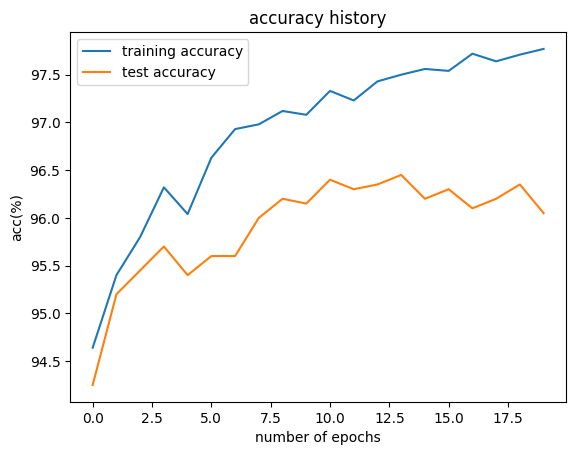

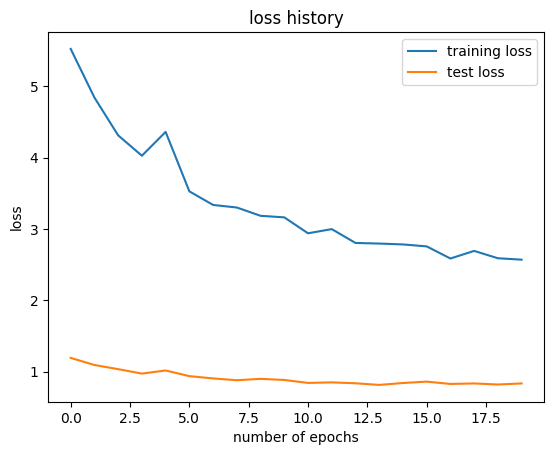

In [6]:
#plot accuracy per epoch
plt.plot(trainacc,label='training accuracy')
plt.plot(testacc,label='test accuracy')
plt.title('accuracy history')
plt.xlabel('number of epochs')
plt.ylabel('acc(%)')
plt.legend()
plt.show()
#plot loss per epoch
plt.plot(trainloss,label='training loss')
plt.plot(testloss,label='test loss')
plt.title('loss history')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# B triplet

In this section first we train feature layer with triplet loss. then we will freeze the parameters and train a classifier layer.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import statistics
import random
import time
import math
%matplotlib inline
from torch.utils.data import DataLoader, Dataset, random_split

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [7]:
transform = transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224),transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Select training_set and testing_set
train_data = datasets.CIFAR10("data", train= True, download=True, transform = transform)
idx=np.where((np.array(train_data.targets)==0)|(np.array(train_data.targets)==1))[0]
train_data.targets=list(np.array(train_data.targets)[idx])
train_data.data=train_data.data[idx]
train_data.classes=train_data.classes[0:2]
train_loader2 = torch.utils.data.DataLoader(train_data, batch_size = batch_size,shuffle=True)

test_data = datasets.CIFAR10("data", train= False, download=True, transform = transform)
idx=np.where(np.array(test_data.targets)<2)[0]
test_data.targets=list(np.array(test_data.targets)[idx])
test_data.data=test_data.data[idx]
test_data.classes=test_data.classes[0:2]
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size,shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


we need to implement dataset class so that the gititem function return three images, anchor , positive and negetive.

In [10]:
class cifar2(Dataset):
    def __init__(self, data, train=True, transform=None):
        self.is_train = train
        self.transform = transform
        self.to_pil = transforms.ToPILImage()

        if self.is_train:
            self.images = data.data#df.iloc[:, 1:].values.astype(np.uint8)
            self.labels = data.targets#df.iloc[:, 0].values
            #self.index = #df.index.values
        else:
            self.images = data.data#df.values.astype(np.uint8)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, item):
        anchor_img = self.images[item]

        if self.is_train:
            anchor_label = self.labels[item]


            positive_list=np.where(np.array(self.labels)==anchor_label)[0]
            #positive_list = self.index[self.index!=item][self.labels[self.index!=item]==anchor_label]
            positive_item = random.choice(positive_list)
            positive_img = self.images[positive_item]#.reshape(28, 28, 1)

            negative_list=np.where(np.array(self.labels)!=anchor_label)[0]
            #negative_list = self.index[self.index!=item][self.labels[self.index!=item]!=anchor_label]
            negative_item = random.choice(negative_list)
            negative_img = self.images[negative_item]#.reshape(28, 28, 1)

            if self.transform:
                anchor_img = self.transform(self.to_pil(anchor_img))
                positive_img = self.transform(self.to_pil(positive_img))
                negative_img = self.transform(self.to_pil(negative_img))
            #print('train')
            return anchor_img, positive_img, negative_img, anchor_label

        else:
            if self.transform:
                anchor_img = self.transform(self.to_pil(anchor_img))
            return anchor_img


In [11]:
train_ds = cifar2(train_data, train=True,transform=transform)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)


In [12]:
class TripletLoss(nn.Module):
    def __init__(self, margin=0.2):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        if(len(anchor.shape)<2):
          distance_positive = torch.dist(anchor, positive, 2)
          distance_negative = torch.dist(anchor, negative, 2)
          loss = torch.relu(distance_positive - distance_negative + self.margin)
        else:
          loss=0
          for i in range(anchor.shape[0]):
              distance_positive = torch.dist(anchor[i], positive[i], 2)
              distance_negative = torch.dist(anchor[i], negative[i], 2)
              loss += torch.relu(distance_positive - distance_negative + self.margin)
          loss/=anchor.shape[0]
        return loss

now we will train feature extractor layers with **triplet** loss:

---



In [39]:
# Set hyperparameters
num_epochs = 10
batch_size = 256
learning_rate = 0.001

#define model
model = torchvision.models.alexnet(pretrained=True)
classifiers=list(model.classifier.children())[:-1]
#classifiers.extend([torch.nn.Linear(4096,2)])
model.classifier= nn.Sequential(*classifiers)

# Move model to the device
model = model.to(device)

# Define loss function and optimizer
x=nn.TripletMarginLoss()
triplet_loss = TripletLoss()
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=learning_rate)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)


# Training loop for feature extraction
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (anchor, positive, negative, labels) in enumerate(train_loader):
        # Move images and labels to the device
        anchor = anchor.to(device)
        positive = positive.to(device)
        negative = negative.to(device)

        anchor_features = model(anchor)
        positive_features = model(positive)
        negative_features = model(negative)

        #triplet_loss_value = triplet_loss(anchor_features, positive_features, negative_features)
        triplet_loss_value = x(anchor_features, positive_features, negative_features)
        #classifier_loss_value = criterion(model.classifier(anchor_features), labels)

        #total_loss += triplet_loss_value.item() + classifier_loss_value.item()
        optimizer.zero_grad()
        loss = triplet_loss_value
        loss.backward()
        optimizer.step()

    # Print training loss every epochs
    trainloss.append(loss.item())
    print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Step [40/40], Loss: 0.1601
Epoch [2/10], Step [40/40], Loss: 0.1355
Epoch [3/10], Step [40/40], Loss: 0.0000
Epoch [4/10], Step [40/40], Loss: 0.0311
Epoch [5/10], Step [40/40], Loss: 0.1183
Epoch [6/10], Step [40/40], Loss: 0.0866
Epoch [7/10], Step [40/40], Loss: 0.0038
Epoch [8/10], Step [40/40], Loss: 0.0592
Epoch [9/10], Step [40/40], Loss: 0.0000
Epoch [10/10], Step [40/40], Loss: 0.0000


In [ ]:
model.eval()

then we add a fully connected layer to get 2 outputs and train its parameters.

In [40]:
# Set hyperparameters
num_epochs = 10
batch_size = 256
learning_rate = 0.001

#train a classifier
for param in model.parameters():
  param.requires_grad = False
classifiers=list(model.classifier.children())#[:-2]
classifiers.extend([torch.nn.Linear(4096,2)])
model.classifier= nn.Sequential(*classifiers)

# Move model to the device
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

trainloss=[]
testloss=[]
trainacc=[]
testacc=[]
# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader2):
        # Move images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print training loss every epochs
    #trainloss.append(loss.item())
    print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")
    model.eval()
    with torch.no_grad():
      correct = 0
      total = 0
      l=0
      for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        l+=criterion(outputs, labels).item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
      testloss.append(l)
      accuracy = 100 * correct / total
      testacc.append(accuracy)
      #print(f"Test Accuracy: {accuracy:.2f} %")

      correct = 0
      total = 0
      l=0
      for images, labels in train_loader2:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        l+=criterion(outputs, labels).item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
      trainloss.append(l)
      accuracy = 100 * correct / total
      trainacc.append(accuracy)
      #print(f"Test Accuracy: {accuracy:.2f} %")
# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f} %")

Epoch [1/10], Step [40/40], Loss: 0.0413
Epoch [2/10], Step [40/40], Loss: 0.0313
Epoch [3/10], Step [40/40], Loss: 0.0120
Epoch [4/10], Step [40/40], Loss: 0.0272
Epoch [5/10], Step [40/40], Loss: 0.0373
Epoch [6/10], Step [40/40], Loss: 0.0022
Epoch [7/10], Step [40/40], Loss: 0.0069
Epoch [8/10], Step [40/40], Loss: 0.0121
Epoch [9/10], Step [40/40], Loss: 0.0175
Epoch [10/10], Step [40/40], Loss: 0.0181
Test Accuracy: 98.20 %


we conclude that adding triplet loss leads to accuracy increasement. in our model accuracy reaches from 96 to 97.5 percent.

besides, training loss is much less that training loss without  triplet loss in part A and training accuracy reaches to 99 percent.
thus, the model extremely improved comparing to the model without triplet loss.

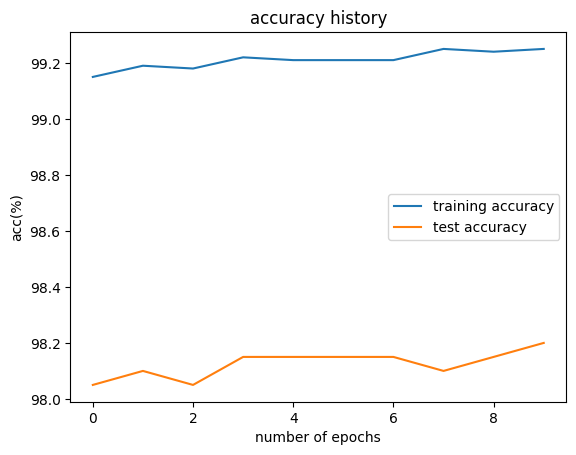

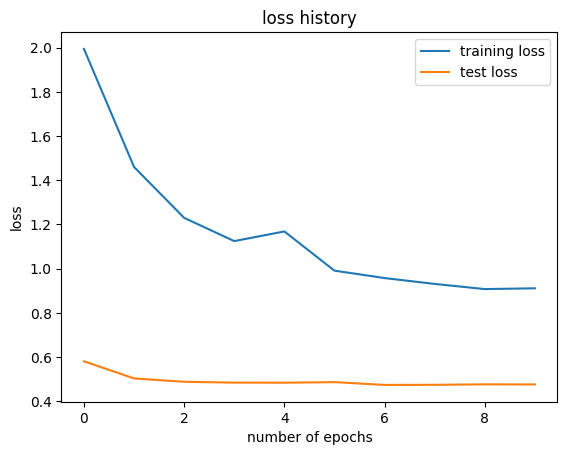

In [41]:
#plot accuracy per epoch
plt.plot(trainacc,label='training accuracy')
plt.plot(testacc,label='test accuracy')
plt.title('accuracy history')
plt.xlabel('number of epochs')
plt.ylabel('acc(%)')
plt.legend()
plt.show()
#plot loss per epoch
plt.plot(trainloss,label='training loss')
plt.plot(testloss,label='test loss')
plt.title('loss history')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# C triplet + crossentropy

In this section we train all parameters together with a loss function sum of triplet loss and cross-entropy.

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import statistics
import random
import time
import math
%matplotlib inline
from torch.utils.data import DataLoader, Dataset, random_split

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

In [30]:
class cifar2(Dataset):
    def __init__(self, data, train=True, transform=None):
        self.is_train = train
        self.transform = transform
        self.to_pil = transforms.ToPILImage()

        if self.is_train:
            self.images = data.data#df.iloc[:, 1:].values.astype(np.uint8)
            self.labels = data.targets#df.iloc[:, 0].values
            #self.index = #df.index.values
        else:
            self.images = data.data#df.values.astype(np.uint8)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, item):
        anchor_img = self.images[item]

        if self.is_train:
            anchor_label = self.labels[item]


            positive_list=np.where(np.array(self.labels)==anchor_label)[0]
            #positive_list = self.index[self.index!=item][self.labels[self.index!=item]==anchor_label]
            positive_item = random.choice(positive_list)
            positive_img = self.images[positive_item]#.reshape(28, 28, 1)

            negative_list=np.where(np.array(self.labels)!=anchor_label)[0]
            #negative_list = self.index[self.index!=item][self.labels[self.index!=item]!=anchor_label]
            negative_item = random.choice(negative_list)
            negative_img = self.images[negative_item]#.reshape(28, 28, 1)

            if self.transform:
                anchor_img = self.transform(self.to_pil(anchor_img))
                positive_img = self.transform(self.to_pil(positive_img))
                negative_img = self.transform(self.to_pil(negative_img))
            #print('train')
            return anchor_img, positive_img, negative_img, anchor_label

        else:
            if self.transform:
                anchor_img = self.transform(self.to_pil(anchor_img))
            return anchor_img

In [31]:
transform = transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224),transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Select training_set and testing_set
train_data = datasets.CIFAR10("data", train= True, download=True, transform = transform)
idx=np.where((np.array(train_data.targets)==0)|(np.array(train_data.targets)==1))[0]
train_data.targets=list(np.array(train_data.targets)[idx])
train_data.data=train_data.data[idx]
train_data.classes=train_data.classes[0:2]

train_ds = cifar2(train_data, train=True,transform=transform)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
train_loader2 = torch.utils.data.DataLoader(train_data, batch_size = batch_size,shuffle=True)

test_data = datasets.CIFAR10("data", train= False, download=True, transform = transform)
idx=np.where(np.array(test_data.targets)<2)[0]
test_data.targets=list(np.array(test_data.targets)[idx])
test_data.data=test_data.data[idx]
test_data.classes=test_data.classes[0:2]
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size,shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


in order to increase the performance, we initialized the model with model parameters of section 2. then we trained model with a new loss, sum of triplet loss for feature extraction and cross entropy loss for classification.

In [42]:
# Set hyperparameters
num_epochs = 10
batch_size = 256
learning_rate = 0.001


#define model
for param in model.parameters():
  param.requires_grad = True
#model = torchvision.models.alexnet(pretrained=True)
classifiers=list(model.classifier.children())
classifier=classifiers[-1]
#classifiers.extend([torch.nn.Linear(4096,2)])
model.classifier= nn.Sequential(*classifiers[:-1])

# Move model to the device
model = model.to(device)
classifier=classifier.to(device)

# Define loss function and optimizer
x=nn.TripletMarginLoss()
triplet_loss = TripletLoss()
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=learning_rate)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

trainloss=[]
testloss=[]
trainacc=[]
testacc=[]
# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    model.train()
    for i, (anchor, positive, negative, labels) in enumerate(train_loader):
        # Move images and labels to the device
        anchor = anchor.to(device)
        positive = positive.to(device)
        negative = negative.to(device)
        labels = labels.to(device)

        anchor_features = model(anchor)
        positive_features = model(positive)
        negative_features = model(negative)

        #triplet_loss_value = triplet_loss(anchor_features, positive_features, negative_features)
        triplet_loss_value = x(anchor_features, positive_features, negative_features)
        #classifier=torch.nn.Linear(4096,2).to(device)
        classifier_loss_value = criterion(classifier(anchor_features), labels)

        #total_loss = triplet_loss_value.item() + classifier_loss_value.item()
        optimizer.zero_grad()
        loss = triplet_loss_value + classifier_loss_value
        loss.backward()
        optimizer.step()

    # Print training loss every epochs
    #trainloss.append(loss.item())
    print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")
    model.eval()
    with torch.no_grad():
      correct = 0
      total = 0
      l=0
      for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = classifier(model(images))
        l+=criterion(outputs, labels).item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
      testloss.append(l)
      accuracy = 100 * correct / total
      testacc.append(accuracy)
      #print(f"Test Accuracy: {accuracy:.2f} %")

      correct = 0
      total = 0
      l=0
      for images, labels in train_loader2:
        images = images.to(device)
        labels = labels.to(device)

        outputs = classifier(model(images))
        l+=criterion(outputs, labels).item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
      trainloss.append(l)
      accuracy = 100 * correct / total
      trainacc.append(accuracy)
      #print(f"Test Accuracy: {accuracy:.2f} %")
# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = classifier(model(images))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f} %")

Epoch [1/10], Step [40/40], Loss: 0.0485
Epoch [2/10], Step [40/40], Loss: 0.3108
Epoch [3/10], Step [40/40], Loss: 0.1010
Epoch [4/10], Step [40/40], Loss: 0.0010
Epoch [5/10], Step [40/40], Loss: 0.0015
Epoch [6/10], Step [40/40], Loss: 0.0027
Epoch [7/10], Step [40/40], Loss: 0.0011
Epoch [8/10], Step [40/40], Loss: 0.2385
Epoch [9/10], Step [40/40], Loss: 0.0614
Epoch [10/10], Step [40/40], Loss: 0.0455
Test Accuracy: 98.30 %


we can easily conclude that this model outperform the two previous ones.

model test accuracy exceed 98 percent. also train accuracy reaches near 100.

train loss is much less than train loss in previous section. however test loss reaches to approximately constant value.

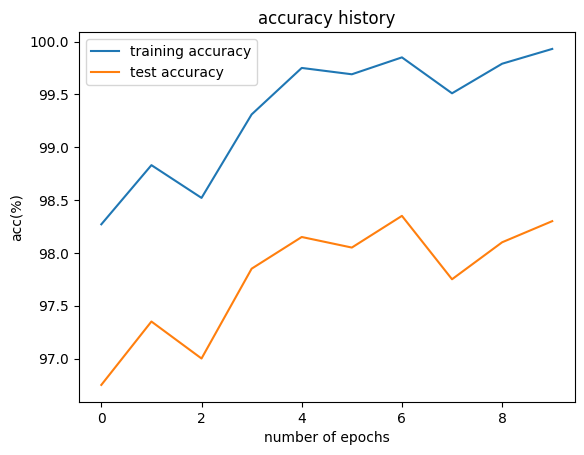

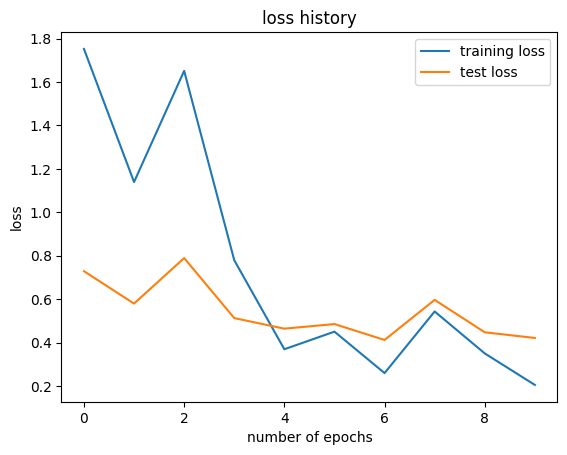

In [43]:
#plot accuracy per epoch
plt.plot(trainacc,label='training accuracy')
plt.plot(testacc,label='test accuracy')
plt.title('accuracy history')
plt.xlabel('number of epochs')
plt.ylabel('acc(%)')
plt.legend()
plt.show()
#plot loss per epoch
plt.plot(trainloss,label='training loss')
plt.plot(testloss,label='test loss')
plt.title('loss history')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
classifiers=list(model.classifier.children())
#classifier=classifiers[-1]
classifiers.extend([classifier])
model.classifier= nn.Sequential(*classifiers)

In [47]:
model.eval

<bound method Module.eval of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, ou

In [49]:
#save final model
torch.save(model.state_dict(), 'drive/My Drive/Colab Notebooks/deep/model_weights.pth')


In [50]:
model2 = torchvision.models.alexnet() # we do not specify ``weights``, i.e. create untrained model
model2.classifier[6] = nn.Linear(4096, 2)
model2.load_state_dict(torch.load('drive/My Drive/Colab Notebooks/deep/model_weights.pth'))
model2.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 